# Youtube API - Elvis Presley

I will search for information about videos titled Elvis Presley in Youtube using Youtube API.

In [7]:
# import necessary libraries
from apiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [8]:
with open('credential.json') as file:
    data = json.load(file)
# my credentials to use in 'build' function
DEVELOPER_KEY = data['api_key']
API_NAME = 'youtube'
API_VERSION = 'v3'


In [9]:
# give your credentials to use Youtube API
youtube = build(API_NAME,API_VERSION, developerKey = DEVELOPER_KEY) 

In [10]:
# make a search for video id's
request = youtube.search().list(part='id', type='video', q='Elvis Presley', maxResults=50, order='viewCount')
response = request.execute()

In [11]:
response

{'kind': 'youtube#searchListResponse',
 'etag': 'effaFRdJs3b0uNbYaYeHy8fDNQg',
 'nextPageToken': 'CDIQAA',
 'regionCode': 'GB',
 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#searchResult',
   'etag': '722rlf6VhsdImNn_j9tl7SjEAzs',
   'id': {'kind': 'youtube#video', 'videoId': 'vGJTaP6anOU'}},
  {'kind': 'youtube#searchResult',
   'etag': 'N73XNpAneZVRw8aQVNHdIVOkjDo',
   'id': {'kind': 'youtube#video', 'videoId': 'gj0Rz-uP4Mk'}},
  {'kind': 'youtube#searchResult',
   'etag': 'vQxVPiyawQPNIWwqdg0r50ng3PA',
   'id': {'kind': 'youtube#video', 'videoId': 'u9sRJ-eOHnc'}},
  {'kind': 'youtube#searchResult',
   'etag': 'sJCoVeMINIP-yzxeBkceMQDP9x0',
   'id': {'kind': 'youtube#video', 'videoId': 'SBmAPYkPeYU'}},
  {'kind': 'youtube#searchResult',
   'etag': '3yTkO71iyCGzUYUSskBKdOta8HQ',
   'id': {'kind': 'youtube#video', 'videoId': 'Wb0Jmy-JYbA'}},
  {'kind': 'youtube#searchResult',
   'etag': 'wlZ0mxKFYvJuNYl15tTAgU8GX_Y',
   'id': {'kind': 'youtu

In [12]:
# get only id numbers in a list from json result file
video_ids = [] # create an empty list
for item in response['items']:
    video_ids.append(item['id']['videoId']) # put videoId's into the list
video_ids = ','.join(video_ids) # join by putting comma between them
video_ids

'vGJTaP6anOU,gj0Rz-uP4Mk,u9sRJ-eOHnc,SBmAPYkPeYU,Wb0Jmy-JYbA,0M0RbaPxq2k,2Ox1Tore9nw,tpzV_0l5ILI,Bm5HKlQ6nGM,QkMVscR5YOo,zf2VYAtqRe0,RxOBOhRECoo,PU5xxh5UX4U,B3XdXEJEI4E,AG9ph9xkOrw,PpsUOOfb-vE,3KK6sMo8NBY,lzQ8GDBA8Is,z8MOIs0Dd5g,u4csFnpZXek,3rQEbQJx5Bo,T1Ond-OwgU8,_cS5aCozhcA,ViMF510wqWA,-Y-bd3aDMGA,gd4mB-zUcO8,Zx1_6F-nCaw,MQrlBIMTzIM,GZ-k3oblIM8,VPDY8NU3N0o,mLbOBoa8vD8,emjLXdsj6xA,yoH367Dg4YY,KnhamPnvXuQ,rPMaTf0KU0M,-eHJ12Vhpyc,yTwJvVTQ6-0,prErnop1eiM,e9BLw4W5KU8,ixbcvKCl4Jc,iba7TdQMFD4,SV6ICc7YXAA,ZQxMoel34Sc,YU2U3QAUGak,MyrQqmc5UT8,e-NDXtDUcGQ,qzIMHk6Z2l8,2En0ZyjQgU4,n1YKv_Pl8PU,OTdPL8Gvtp4'

In [13]:
# make second search using video id's, get statistics (view count, like count vs.)
request = youtube.videos().list(part="snippet,statistics", id=video_ids)
response2 = request.execute()

In [14]:
len(response2['items']) # check if all 50 items searched 

50

In [15]:
# tke data from json to pandas dataframe
df = pd.DataFrame()
df2 = pd.DataFrame()
for i in range(0, len(response2['items'])):
    df = df.append(response2['items'][i]['snippet'], ignore_index=True)
    df2 =df2.append(response2['items'][i]['statistics'], ignore_index=True)
df = pd.concat([df,df2], axis=1)

In [16]:
df.head(4)

,categoryId,channelId,channelTitle,defaultAudioLanguage,description,liveBroadcastContent,localized,publishedAt,tags,thumbnails,title,defaultLanguage,commentCount,dislikeCount,favoriteCount,likeCount,viewCount
0,10,UCSEmH1YyFWltSBYkfLMtkcg,ElvisPresleyVEVO,en-US,"""Can't Help Falling In Love"" by Elvis Presley ...",none,{'title': 'Elvis Presley - Can't Help Falling ...,2013-04-23T07:00:10Z,"[elvis presley, elvis presley cant help fallin...",{'default': {'url': 'https://i.ytimg.com/vi/vG...,Elvis Presley - Can't Help Falling In Love (Au...,NaN,60548,35144,0,1973952,222136613
1,10,UCQcGGGjHb0pqo2ol9Ksmoyg,gaza45454545,NaN,"Get First Page Rankings, Locally, For Your Bus...",none,{'title': 'Elvis Presley - Jailhouse Rock (Mus...,2007-12-27T01:06:07Z,"[Elvis, Presley, Jailhouse, Rock, the, Beatles...",{'default': {'url': 'https://i.ytimg.com/vi/gj...,Elvis Presley - Jailhouse Rock (Music Video),NaN,41630,31451,0,1238641,187495335
2,10,UCTLuaC9jOEHoMcm5gHTfoaA,D Patek,NaN,Elvis Presley - Always On My Mind (1985 overdu...,none,"{'title': 'Elvis Presley - Always On My Mind',...",2008-12-23T17:53:57Z,"[elvis, presley, always, on, my, mind, 1972, 1...",{'default': {'url': 'https://i.ytimg.com/vi/u9...,Elvis Presley - Always On My Mind,NaN,20821,19816,0,519636,138084742
3,22,UCOtjW284h_afsL7sphyjq1g,clareconvy,NaN,Video Suspicious Mind,none,"{'title': 'Suspicious Mind - Elvis Presley', '...",2007-08-14T21:08:37Z,"[Elvis, presley]",{'default': {'url': 'https://i.ytimg.com/vi/SB...,Suspicious Mind - Elvis Presley,NaN,25372,19618,0,369182,127731914


In [17]:
# clean data, drop unnecessray columns
data = df[['description','publishedAt','tags','title','commentCount','dislikeCount','likeCount','viewCount']]
data.head(5)

,description,publishedAt,tags,title,commentCount,dislikeCount,likeCount,viewCount
0,"""Can't Help Falling In Love"" by Elvis Presley ...",2013-04-23T07:00:10Z,"[elvis presley, elvis presley cant help fallin...",Elvis Presley - Can't Help Falling In Love (Au...,60548,35144,1973952,222136613
1,"Get First Page Rankings, Locally, For Your Bus...",2007-12-27T01:06:07Z,"[Elvis, Presley, Jailhouse, Rock, the, Beatles...",Elvis Presley - Jailhouse Rock (Music Video),41630,31451,1238641,187495335
2,Elvis Presley - Always On My Mind (1985 overdu...,2008-12-23T17:53:57Z,"[elvis, presley, always, on, my, mind, 1972, 1...",Elvis Presley - Always On My Mind,20821,19816,519636,138084742
3,Video Suspicious Mind,2007-08-14T21:08:37Z,"[Elvis, presley]",Suspicious Mind - Elvis Presley,25372,19618,369182,127731914
4,Elvis Presley performing Suspicious Minds at h...,2012-10-23T10:46:48Z,"[Elvis, Presley, Suspicious, Minds, Live, That...",Elvis Presley Suspicious Minds Live in Las Vegas,23229,23070,423278,109313324


In [18]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   50 non-null     object
 1   publishedAt   50 non-null     object
 2   tags          48 non-null     object
 3   title         50 non-null     object
 4   commentCount  45 non-null     object
 5   dislikeCount  49 non-null     object
 6   likeCount     49 non-null     object
 7   viewCount     50 non-null     object
dtypes: object(8)
memory usage: 3.2+ KB


In [19]:
# change Nan values with 0
data = data.fillna(0)

# change object data types as numeric
data['publishedAt'] = data['publishedAt'].astype('datetime64')
data['commentCount'] = data['commentCount'].astype('int64')
data['dislikeCount'] = data['dislikeCount'].astype('int64')
data['likeCount'] = data['likeCount'].astype('int64')
data['viewCount'] = data['viewCount'].astype('int64')
data['title'] = data['title'].astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   description   50 non-null     object        
 1   publishedAt   50 non-null     datetime64[ns]
 2   tags          50 non-null     object        
 3   title         50 non-null     object        
 4   commentCount  50 non-null     int64         
 5   dislikeCount  50 non-null     int64         
 6   likeCount     50 non-null     int64         
 7   viewCount     50 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.2+ KB


### Top 5 Viewed Videos of Elvis Presley

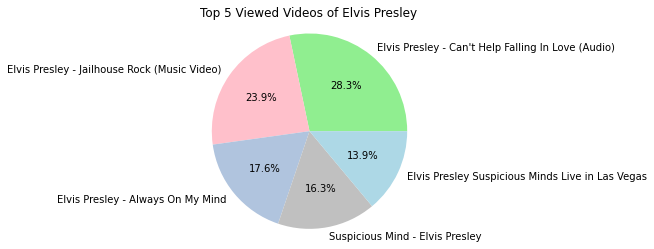

In [20]:
# create a pie chart using matplotlib.pyplot
top5 = data.head(5)
my_colors= ['lightgreen','pink','lightsteelblue','silver','lightblue']
plt.pie(top5['viewCount'],labels=top5['title'],autopct='%1.1f%%', colors=my_colors)
plt.axis('equal')
plt.title('Top 5 Viewed Videos of Elvis Presley')
plt.show()

### Top 10 Videos of Elvis Presley by count of Views, Likes, Dislikes and Comments

Text(0.5, 1.0, 'Top10 Elvis Presley Videos by Views')

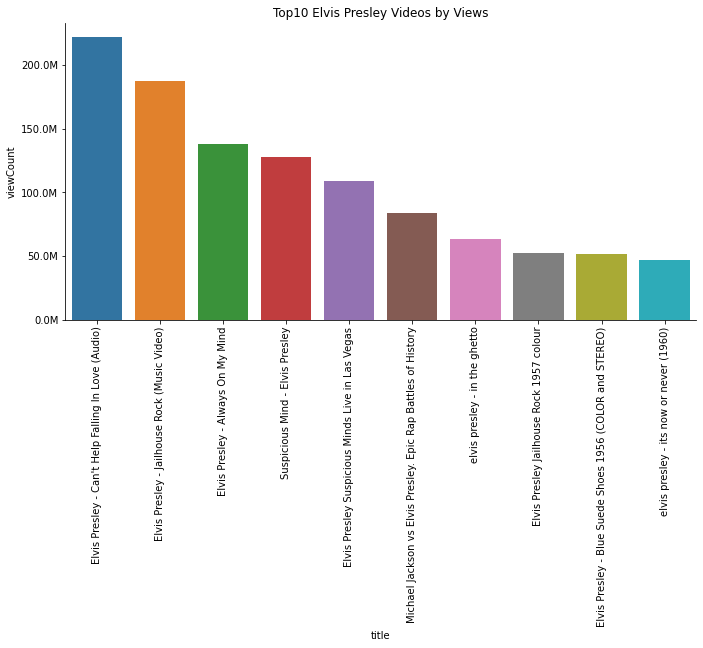

In [21]:
top10 = data.head(10)
fig = sns.catplot(x='title', y='viewCount', kind='bar', data=top10, ci=None, height=5, aspect=11/5)
fig.set_xticklabels(rotation=90) # rotate x labels

ticks = fig.axes[0][0].get_yticks()

# function converts y labels into millions(M)
def millions(ticks):
    ylabels = []
    for y in ticks:
        ylabels.append(str(y / 1000000) + 'M')
    return ylabels

ylabels = millions(ticks)
fig.set_yticklabels(ylabels)
plt.title('Top10 Elvis Presley Videos by Views')

Text(0.5, 1.0, 'Top10 Elvis Presley Videos by Likes')

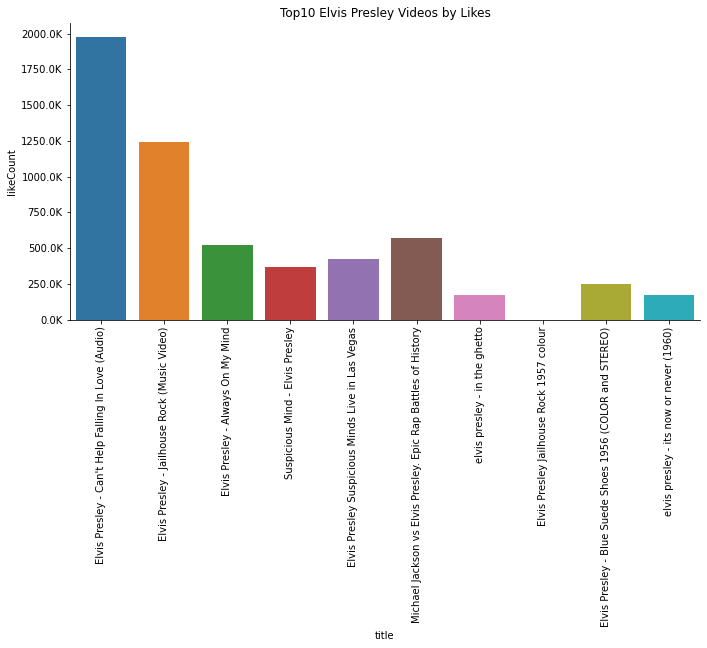

In [22]:
fig = sns.catplot(x='title', y='likeCount', kind='bar', data=top10, ci=None, height=5, aspect=11/5)
fig.set_xticklabels(rotation=90) # rotate x labels
ticks = fig.axes[0][0].get_yticks()

# function converts y labels into thousand(K)
def thousand(ticks):
    ylabels = []
    for y in ticks:
        ylabels.append(str(y / 1000) + 'K')
    return ylabels

ylabels = thousand(ticks)
fig.set_yticklabels(ylabels)
plt.title('Top10 Elvis Presley Videos by Likes')

Text(0.5, 1.0, 'Top10 Elvis Presley Videos by Dislikes')

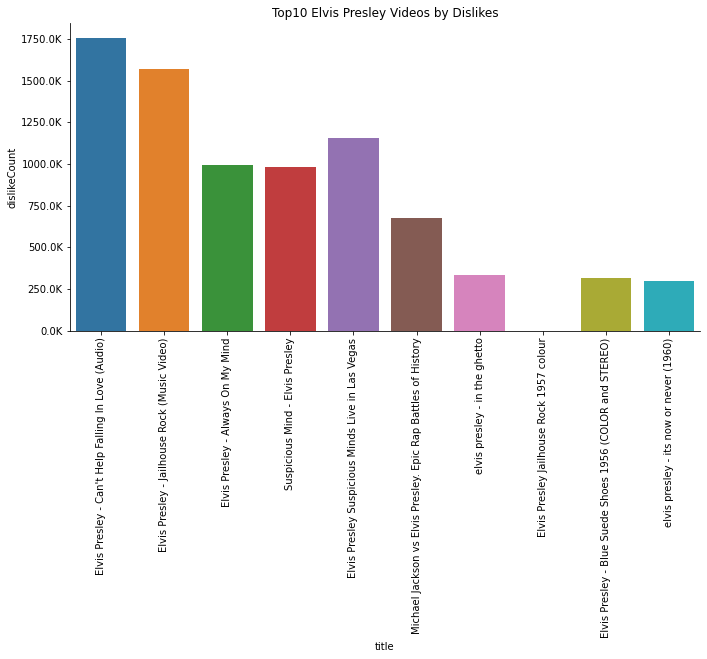

In [23]:
fig = sns.catplot(x='title', y='dislikeCount', kind='bar', data=top10, ci=None, height=5, aspect=11/5)
fig.set_xticklabels(rotation=90) # rotate x labels
# function converts y labels into thousand(K)
def thousand(ticks):
    ylabels = []
    for y in ticks:
        ylabels.append(str(y / 1000) + 'K')
    return ylabels

ylabels = thousand(ticks)
fig.set_yticklabels(ylabels)
plt.title('Top10 Elvis Presley Videos by Dislikes')

Text(0.5, 1.0, 'Top10 Elvis Presley Videos by Comments')

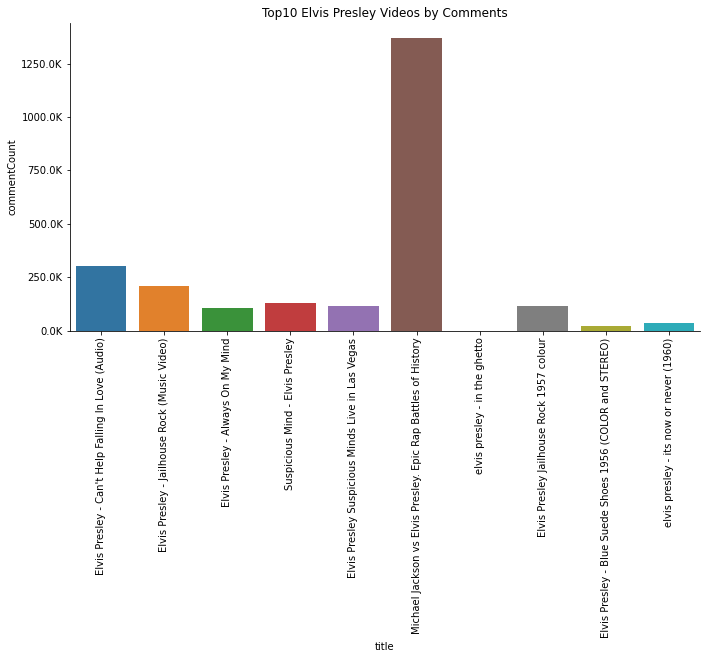

In [24]:
fig = sns.catplot(x='title', y='commentCount', kind='bar', data=top10, ci=None, height=5, aspect=11/5)
fig.set_xticklabels(rotation=90) # rotate x labels
# function converts y labels into thousand(K)
def thousand(ticks):
    ylabels = []
    for y in ticks:
        ylabels.append(str(y / 1000) + 'K')
    return ylabels

ylabels = thousand(ticks)
fig.set_yticklabels(ylabels)
plt.title('Top10 Elvis Presley Videos by Comments')

### Comparison of Comment-View Counts and Like-Dislike Counts

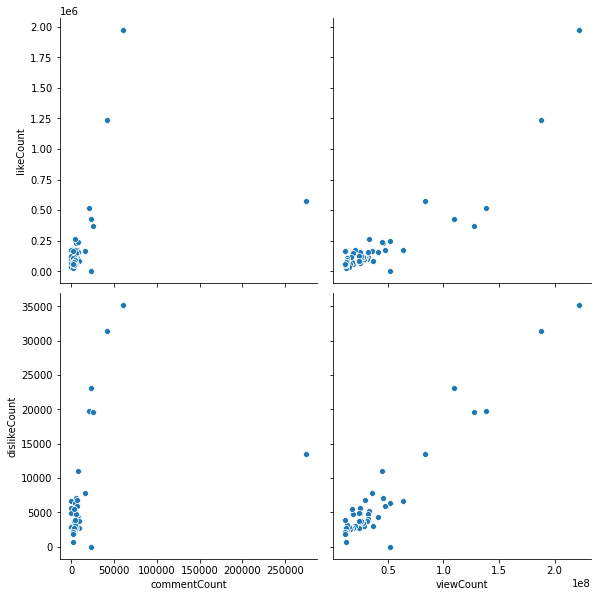

In [25]:
sns.pairplot(data,x_vars=['commentCount','viewCount'],y_vars=['likeCount','dislikeCount'],height=4)

### CloudWord of Elvis Presley Video Tags

In [26]:
tag = data['tags'].tolist()
def word(tag):
    text = []
    for t in tag:
        if(not isinstance(t, int)):
            text += t
    return text
text = word(tag)
text

['elvis presley',
 'elvis presley cant help falling in love',
 'little egypt trouble',
 'let yourself go',
 'i cant help falling in love',
 'jailhouse rock',
 'suspicious minds',
 'hound dog',
 'burning love',
 'a little less conversation',
 'blue christmas',
 'official elvis presley',
 'classic rock',
 'rock and roll',
 'official elvis',
 'love songs',
 'classic love song',
 "Can't Help Falling In Love (Audio)",
 'Elvis Presley',
 'Pop',
 'RCA/Legacy',
 'Elvis',
 'Presley',
 'Jailhouse',
 'Rock',
 'the',
 'Beatles',
 'monkeys',
 'rolling',
 'stones',
 'youtube',
 'most',
 'viewed',
 'views',
 'on',
 'sex',
 'sexy',
 'girl',
 'men',
 'man',
 'woman',
 'naked',
 'dance',
 'old',
 'elvis',
 'presley',
 'always',
 'on',
 'my',
 'mind',
 '1972',
 '1985',
 'overdub',
 'orchestral',
 'Elvis',
 'presley',
 'Elvis',
 'Presley',
 'Suspicious',
 'Minds',
 'Live',
 "That's",
 'The',
 'Way',
 'It',
 'Is',
 '1970',
 'jackson vs presley',
 'elvis rap battle',
 'elvis rap',
 'jackson vs elvis',
 'elv

In [27]:
tag_words = '' 
stopwords = set(STOPWORDS) 

for val in text:   
    val = str(val) 
    tokens = val.split()      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    tag_words += " ".join(tokens)+" "
    
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tag_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
  

NameError: name 'STOPWORDS' is not defined